# Introduction

**How I Used RFM Analysis to Craft Smarter Promotion Strategies**

In the world of digital marketing and e-commerce, not all customers are created equal. Some shop frequently, others spend more, and some haven’t visited in months. Instead of blasting promotions to everyone, what if we could target the right people with the right message?<br><br>

**What Is RFM?**<br>
RFM stands for:<br>
  * Recency – How recently a customer made a purchase
  * Frequency – How often they make purchases
  * Monetary – How much money they spend<br>

These three simple metrics, when combined, offer powerful insights into customer behavior. By scoring customers based on RFM, we can segment them into meaningful groups—such as:
  * Loyal Champions who purchase often and spend a lot
  * Potential Loyalists who are starting to build a relationship
  * At Risk customers who haven’t returned in a while
  * Or even Lost customers who might be slipping away
Rather than guessing who to target, RFM gives us data-driven clarity.<br><br>

**Key Questions We Set Out to Answer**

Before diving into the data, we defined several guiding questions to help shape our analysis and focus our promotional strategy:
  * What does our overall customer landscape look like based on RFM scores?
  * Which customer segments contribute the most to our revenue and long-term value?
  * How strong is our base of loyal customers—and how many are at risk of churning?
  * What type of promotional approach makes sense for each segment?

# Import Library

In [49]:
# Data wragling & cleansing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [50]:
#Import dataset
df = pd.read_excel('Transactions 2024.xlsx')


In [51]:
#First Insight
print(f'Number of column: {df.shape[0]}')
print(f'Number of rows: {df.shape[1]}')

print(f'\nColumn Name: \n{df.columns.to_list()}\n')
print(f'Number of duplicate values: {df.duplicated().sum()}\n')
print('Number of missing values:')
print(df.isna().sum())

Number of column: 1318
Number of rows: 5

Column Name: 
['Day', 'Customer ID', 'Order ID', 'Quantity', 'Revenue']

Number of duplicate values: 20

Number of missing values:
Day             0
Customer ID    17
Order ID       17
Quantity        0
Revenue         0
dtype: int64


## Remove Missing Value

In [52]:
df = df.dropna()
print('Result after removed missing value:')
print(df.isna().sum())

Result after removed missing value:
Day            0
Customer ID    0
Order ID       0
Quantity       0
Revenue        0
dtype: int64


## Column Name Standardization

In [53]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'day': 'date'}, inplace=True)
df.columns

Index(['date', 'customer_id', 'order_id', 'quantity', 'revenue'], dtype='object')

## Data Type Standardization

In [54]:
df.customer_id = df.customer_id.astype(int).astype(str)
df.order_id = df.order_id.astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1317
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1301 non-null   datetime64[ns]
 1   customer_id  1301 non-null   object        
 2   order_id     1301 non-null   object        
 3   quantity     1301 non-null   int64         
 4   revenue      1301 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.0+ KB


## Check and delete orders and purchases with a value of 0

In [55]:
print(f"The number of order quantities with a value of 0 is: {(df['quantity'] == 0).sum()}")
print(f"The number of purchases with a value of 0 is: {(df['revenue'] == 0).sum()}")

The number of order quantities with a value of 0 is: 14
The number of purchases with a value of 0 is: 450


In [56]:
# Hapus record order dan gross sales  yang bernilai 0
df = df[~((df['quantity'] == 0) | (df['revenue'] == 0))]
print('After removing zero values:')
print(f"The number of order quantities with a value of 0 is: {(df['quantity'] == 0).sum()}")
print(f"The number of purchases with a value of 0 is: {(df['revenue'] == 0).sum()}")

After removing zero values:
The number of order quantities with a value of 0 is: 0
The number of purchases with a value of 0 is: 0


## Remove Duplicate Values

In [57]:
# Cek jumlah duplicate
count_cuplicate = df.duplicated().sum()
print(f'Number of columns: {df.shape[0]}')
print(f'Number of duplicate: {int(count_cuplicate)}')
print('\nData cleaning complete. Dataframe is ready for analysis.✅')

Number of columns: 837
Number of duplicate: 0

Data cleaning complete. Dataframe is ready for analysis.✅


# Explratory Data Analysis

In [58]:
df.describe()

,date,quantity,revenue
count,837,837.000000,8.370000e+02
mean,2024-06-04 07:20:25.806451712,1.651135,9.821636e+05
min,2024-01-01 00:00:00,1.000000,5.900000e+04
25%,2024-02-24 00:00:00,1.000000,4.990000e+05
50%,2024-05-13 00:00:00,1.000000,8.990000e+05
75%,2024-09-09 00:00:00,2.000000,1.248100e+06
max,2024-12-31 00:00:00,6.000000,4.879000e+06
std,NaN,0.861269,5.954784e+05


## Bagaimana distribusi quantity dan sales

In [59]:
# Subplot setting
fig_box = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Quantity Distribution",
        "Revenue Distribution")
)

# Box plot quantity
fig_box.add_trace(go.Box(y=df['quantity'], name='Quantity'), row=1, col=1)
# Box plot sales
fig_box.add_trace(go.Box(y=df['revenue'], name='Revenue'), row=1, col=2)

fig_box.show()

## Bagaimana Tren Penjualan 2024

In [60]:
# Add new column month_num & month_name
df['month_num'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

# Grouping berdasarkan tahun
df_rev_24 = df.groupby(['month_num','month_name'])['revenue'].sum().reset_index()

fig_line_rev24 = px.line(
    df_rev_24,
    x = 'month_name',
    y = 'revenue',
    markers= True,
    title= 'Total Revenue 2024',
    width= 800,
    height= 400

)

fig_line_rev24.update_layout(
    xaxis_title = 'Month',
    yaxis_title = 'Revenue',
    title_x= 0.5    #Memposisikan title di tengah
)

fig_line_rev24.show()


## BagaimAna Tren Penjualan Bulanan

## Sales per Quantity Annualy

In [61]:
# Grouping untuk data sales per unit
df_spu24 = df.groupby(['month_num','month_name']).agg({'quantity': 'sum','revenue': 'sum'}).reset_index()

# tambah kolom sales per unit
df_spu24['sales_per_unit'] = (df_spu24['revenue'] / df_spu24['quantity']).astype(int)


fig_spu24 = make_subplots(specs=[[{"secondary_y": True}]])
    # Bar chart: Quantity
fig_spu24.add_trace(go.Bar(
    x=df_spu24['month_name'],
    y=df_spu24['quantity'],
    name='Quantity',
    marker_color='lightblue',
), secondary_y=False)

    # Line chart: Total Sales
fig_spu24.add_trace(go.Scatter(
    x=df_spu24['month_name'],
    y=df_spu24['sales_per_unit'],
    name='Sales Per Unit',
    mode='lines+markers',
    line=dict(color='darkblue'),
), secondary_y=True)

# Layout tambahan
fig_spu24.update_layout(
    title='Combo Chart: Quantity dan Sales per Unit',
    title_x=0.5,
    xaxis_title='Year',
    legend=dict(x=0.5, xanchor='center', orientation='h'),
    width=800,
    height=600,
)

fig_spu24.update_yaxes(title_text='Quantity', secondary_y=False)
fig_spu24.update_yaxes(title_text='Sales per Unit', secondary_y=True)

fig_spu24.show()
print('Walaupun order quantity menurun namun sales per order meningkat dari tahun ke tahun')
print('Diduga harga proruk dari tahun ke tahun makin meningkat, kemungkinan karena strategy premium pricing')

Walaupun order quantity menurun namun sales per order meningkat dari tahun ke tahun
Diduga harga proruk dari tahun ke tahun makin meningkat, kemungkinan karena strategy premium pricing


# Analisis lanjutan: Customer Segmentation - RFM Analysis

## Calculating Recency, Frequensi, Monetary Values

In [62]:
from datetime import datetime
df['recency'] = (df['date'].max().date() - df['date'].dt.date)

# Calculate Frequency
frequency_data = df.groupby('customer_id')['order_id'].count().reset_index()
frequency_data.rename(columns={'order_id': 'frequency'}, inplace=True)
df = df.merge(frequency_data, on='customer_id', how='left')

# Calculate Monetary Value
monetary_data = df.groupby('customer_id')['revenue'].sum().reset_index()
monetary_data.rename(columns={'revenue': 'monetary'}, inplace=True)
df = df.merge(monetary_data, on='customer_id', how='left')
# remove column revenue
df = df.drop(columns='revenue')

## Calculating RFM Scores

In [63]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# calculating RFM Scores
df['recency_score'] = pd.cut(df['recency'], bins=5, labels=recency_scores).astype(int)
df['frequency_score'] = pd.cut(df['frequency'], bins=5, labels=frequency_scores).astype(int)
df['monetary_score'] = pd.cut(df['monetary'], bins=5, labels=monetary_scores).astype(int)

## RFM Value Segmentation

In [64]:
## RFM Value Segmentation
# Calculate RFM score by combining the individual scores
df['rfm_score'] = df['recency_score'] + df['frequency_score'] + df['monetary_score']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['value_segment'] = pd.qcut(df['rfm_score'], q=3, labels=segment_labels)

## RFM Value Distribution

In [65]:
# RFM Segment Distribution
segment_counts = df['value_segment'].value_counts().reset_index()
segment_counts.columns = ['value_segment', 'count']

pastel_colors = px.colors.qualitative.Pastel

# Bar chart segment distribution
fig_segment_dist = px.histogram(segment_counts, x='value_segment', y='count',
                          color='value_segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                            yaxis_title='Count',
                            title_x= 0.5,
                            showlegend=False)

# Show the figure
fig_segment_dist.show()

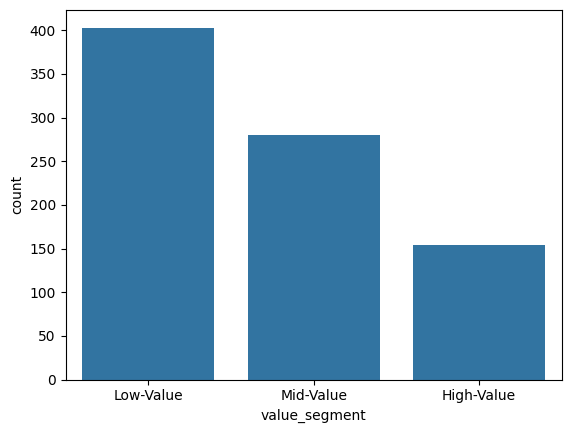

In [75]:
fig_bar_value = sns.barplot(segment_counts, x='value_segment', y='count')
plt.show()

The first step in RFM analysis is mapping all customers based on their value classification: Low-Value, Mid-Value, and High-Value. The results are quite striking — the majority of current customers are concentrated in the Low-Value segment.<br>

This finding offers an initial insight: although the business has successfully reached a large number of customers, only a small portion truly demonstrates loyalty and delivers significant value. In other words, there is growth potential, but it is hidden behind a large number of passive customers. If managed strategically, this group could become a key target for engagement and retention campaigns.

In [66]:
fig_segment_bar = px.histogram(df, x='value_segment', y='monetary',
                          color='value_segment', color_discrete_sequence=pastel_colors,
                          title='Revenue Distribution by Segment')

# Update the layout
fig_segment_bar.update_layout(xaxis_title='RFM Value Segment',
                            yaxis_title='Revenue',
                            title_x= 0.5,
                            showlegend=False)

fig_segment_bar.show()

After understanding the distribution of customer numbers, the next key question is undoubtedly, “Who actually contributes to the revenue?”<br>

The answer becomes clear in this chart: although the Low-Value segment accounts for the largest share in terms of customer count, <b>they are not the main contributors to revenue</b>. In contrast, the <b>High-Value</b> segment, despite being smaller in number, generates nearly the same proportion of revenue as the combined Low and Mid-Value segments. This reinforces a classic business principle known as the Pareto Principle, "20% of customers generate 80% of the value".<br>

The gap between customer count and revenue contribution highlights the importance of segmentation, and makes a strong case for why marketing and retention strategies should not be one-size-fits-all.

## RFM Customer Segment by Value

In [67]:
# Create a new column for RFM Customer Segments
df['rfm_customer_segments'] = ''

# Assign RFM segments based on the RFM score
df.loc[df['rfm_score'] >= 9, 'rfm_customer_segments'] = 'Champions'
df.loc[(df['rfm_score'] >= 6) & (df['rfm_score'] < 9), 'rfm_customer_segments'] = 'Potential Loyalists'
df.loc[(df['rfm_score'] >= 5) & (df['rfm_score'] < 6), 'rfm_customer_segments'] = 'At Risk Customers'
df.loc[(df['rfm_score'] >= 4) & (df['rfm_score'] < 5), 'rfm_customer_segments'] = "Can't Lose"
df.loc[(df['rfm_score'] >= 3) & (df['rfm_score'] < 4), 'rfm_customer_segments'] = "Lost"

In [68]:
# Create tree map for RFM Segment
segment_product_counts = df.groupby(['value_segment', 'rfm_customer_segments']).size().reset_index(name='count')

segment_product_counts = segment_product_counts.sort_values('count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['value_segment', 'rfm_customer_segments'],
                                         values='count',
                                         #width=800,
                                         #height=500,
                                         color='value_segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')

fig_treemap_segment_product.update_layout(title_x= 0.5)

fig_treemap_segment_product.show()

After gaining a high-level view of each value segment, the next step is to dive deeper, to understand who exactly are the customers behind the **Low, Mid, and High-Value segments**.

This treemap helps us explore the composition of each value segment. In the Low-Value segment, there is a strong presence of Lost and Can't Lose Them customers, those who have been inactive for a long time but once showed significant value. In the Mid-Value segment, we see promising groups like Potential Loyalists and At Risk, customers who are at a turning point, teetering between becoming loyal customers or disappearing for good.

Meanwhile, in the High-Value segment, we find an interesting **mix of Champions and Potential Loyalists**. While Champions are the best customers with the highest transaction frequency and value, it is the Potential Loyalists who make up the largest proportion within this group. This highlights an important insight, that many "high-value customers come from potential segments, not from those who were already at the top", but from those who were retained and nurtured over time.

## Distribution of RFM within Champions Segment

In [69]:
# Filter the data to include only the customers in the Champions segment
champions_segment_24 = df[df['rfm_customer_segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment_24['recency_score'], name='Recency', boxpoints='all'))
fig.add_trace(go.Box(y=champions_segment_24['frequency_score'], name='Frequency', boxpoints='all'))
fig.add_trace(go.Box(y=champions_segment_24['monetary_score'], name='Monetary', boxpoints='all'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                yaxis_title='RFM Value',
                title_x= 0.5,
                showlegend=True)

fig.show()

The next focus turns to the **Champions**, the most valuable segment. Through this boxplot, we can observe how the R (Recency), F (Frequency), and M (Monetary) scores are distributed within this group.

It turns out that the **Monetary** scores are consistently high, indicating that these customers make large purchases. The **Frequency** scores are also high, but with a wider spread, suggesting variation in how often they purchase. Interestingly, the **Recency** scores show| a narrower distribution, meaning that most of these customers have made purchases recently, reinforcing their status as "active and loyal."

This pattern reveals that Champions are not only frequent and high-spending customers, but also **recently** active, making them the best candidates for retention.

## RFM Correlation

In [70]:
correlation_matrix_24 = champions_segment_24[['recency_score', 'frequency_score', 'monetary_score']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix_24.values,
                   x=correlation_matrix_24.columns,
                   y=correlation_matrix_24.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment',
                          title_x= 0.5)

fig_heatmap.show()

Through this correlation heatmap, we explore the relationships between metrics within the Champions segment. Interestingly, there is a negative correlation between the recency_score and monetary_score. This means that customers who have transacted recently (high recency score) tend to have lower spending values.<br>

This could indicate that some Champions customers have made recent purchases, but not in large amounts. Meanwhile, customers with high-value purchases made them some time ago, yet remain generally active enough to still be classified as Champions.<br>

Conversely, frequency and monetary show a positive correlation, which intuitively makes sense — customers who buy more frequently also tend to generate higher value.<br>

## Comparison of RFM Segments

In [71]:
pastel_colors = plotly.colors.qualitative.Pastel

segment_counts_24 = df['rfm_customer_segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts_24.index, y=segment_counts_24.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts_24.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  title_x= 0.5,
                  showlegend=False)

fig.show()

After exploring the individual segments, we return to the helicopter view to compare the number of **customers in each granular segment**.<br>

This chart reinforces previous findings: the Potential Loyalists segment dominates in terms of customer count. This group consists of customers who have already demonstrated good frequency and value, but have not yet reached the “Champions” level. If nurtured properly, this group could become the next driver of revenue growth.

## Comparison Segments based on RFM Scores

In [72]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = df.groupby('rfm_customer_segments')[['recency_score', 'frequency_score', 'monetary_score']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['recency_score'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['frequency_score'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['rfm_customer_segments'],
    y=segment_scores['monetary_score'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison Segments based on RFM Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    title_x= 0.5,
    showlegend=True
)

fig.show()

To conclude the exploration, we look at the average RFM scores of each segment. The Champions segment has the highest scores across all aspects, as expected. Potential Loyalists are not far behind, while segments like Lost have low Recency and Frequency scores, indicating long gaps in time and low transaction frequency.<br>

This chart confirms that the differences between segments are not only in customer count or purchase value, but also in overall customer patterns and behaviors. By understanding these patterns, we can design more targeted interventions.

# Strategy & recomendation

From the analysis results, it is clear that the strength of the business lies not merely in the number of customers, but in the quality of their engagement. The Champions and Potential Loyalists segments are valuable assets that need to be nurtured, while the At Risk and Lost segments signal the need for intervention before they are lost completely.<br>
Based on the patterns found, here are several strategic recommendations:
1. Exclusive Loyalty Program
  Offer incentives to the Champion segment. Customers in this group are the most active and contribute the highest revenue. To maintain their loyalty, consider offering exclusive loyalty programs, such as:
  * Reward points redeemable for benefits.
  * Invitations to limited events or special member-only offers.

2. Targeted Reactivation Campaigns with a Personal Approach
  Use a personal approach for At Risk or Lost customers. These customers have not transacted for a long time and are at risk of switching to competitors. Therefore, mass strategies won’t be enough. A more personal and contextual approach is needed, such as:
  * Sending emails with personalized greetings.
  * Offering exclusive discounts just for them, or reminders about their favorite products.
  * Including short surveys to understand their reasons for inactivity, while showing the business values their feedback.
3. Education and Trust Building for Potential Loyal Customers
  This approach suits the Potential Loyalists segment well. Customers in this segment show high potential to become loyal customers but have not yet purchased frequently or built a strong relationship with the brand. Suggested strategies include:
  * Offering discounts on second purchases or bundle offers to encourage repeat buying.
  * Sending educational content about product benefits, testimonials, optimal usage tips, or value they may not yet realize.
4. Dynamic and Iterative Monitoring
  RFM analysis is not a one-time tool. Customer behavior changes over time, with active customers becoming inactive and vice versa. Therefore:
  * Update the RFM analysis regularly — monthly or quarterly, depending on the business cycle.
  * Monitor segment transitions, for example, whether campaigns successfully move At Risk customers to Active, Potential Loyalists to Champions, and so on.